In [1]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf

In [2]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

# Dataframe Ops

In [3]:
# Load the dataset
data1 = spark.read.csv("dataset\col_mat_nuw_output.csv", header=None, inferSchema=True)
data1.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [4]:

data2 = spark.read.csv("dataset\kan_output.csv", header=None, inferSchema=True)
data2.show()

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|2019-01-12|2019-01-13|
|                NULL|Kandy Proper|2019-01-13|2019-01-14|
|                NULL|Kandy Proper|2019-01-14|2019-01-15|
| 9.6363963467

In [5]:

data3 = spark.read.csv("dataset\mon_kur_jaf_output.csv", header=None, inferSchema=True)
data3.show()

+--------------------+------------------+----------+----------+
|                 _c0|               _c1|       _c2|       _c3|
+--------------------+------------------+----------+----------+
|                NULL|Bibile, Monaragala|2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala

In [6]:

column_names = ['HCHO', 'Location', 'Current date', 'Next date']

for i, new_name in enumerate(column_names):
    data1 = data1.withColumnRenamed(data1.columns[i], new_name)

data1.show()

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [7]:

column_names = ['HCHO', 'Location', 'Current date', 'Next date']

for i, new_name in enumerate(column_names):
    data2 = data2.withColumnRenamed(data2.columns[i], new_name)

data2.show()

+--------------------+------------+------------+----------+
|                HCHO|    Location|Current date| Next date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  201

In [8]:

column_names = ['HCHO', 'Location', 'Current date', 'Next date']

for i, new_name in enumerate(column_names):
    data3 = data3.withColumnRenamed(data3.columns[i], new_name)

data3.show()

+--------------------+------------------+------------+----------+
|                HCHO|          Location|Current date| Next date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [9]:
# Concatenate DataFrames vertically
concatenated_df = data1.union(data2).union(data3)

# Show the concatenated DataFrame
concatenated_df.show(300)

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [10]:
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = concatenated_df.toPandas()

# Specify the output path where you want to save the CSV file
output_path_pandas = "dataset/concatenated_pandas.csv"

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv(output_path_pandas, index=False)

# Provide feedback to the user
print(f"Pandas DataFrame saved to {output_path_pandas}")


Pandas DataFrame saved to dataset/concatenated_pandas.csv


In [11]:
concatenated_df.describe()

DataFrame[summary: string, HCHO: string, Location: string]

In [12]:
from pyspark.sql.functions import col, sum

# Checking the sum of the Null values
concatenated_df.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in concatenated_df.columns]).show()


+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|4864|       0|           0|        0|
+----+--------+------------+---------+



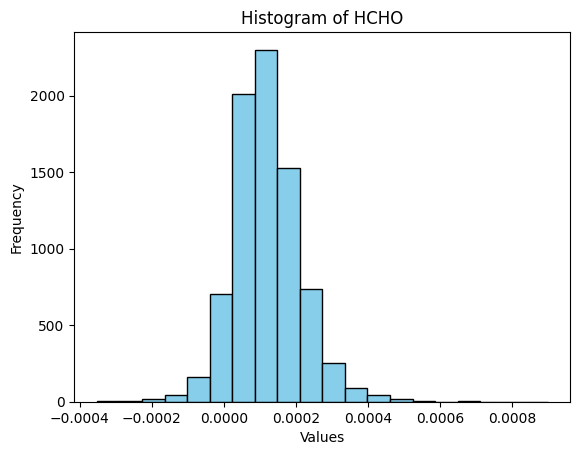

In [13]:
import matplotlib.pyplot as plt


# Extract the values from the DataFrame column
column_values = pandas_df['HCHO']

# Plot the histogram
plt.hist(column_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')

# Show the plot
plt.show()


In [14]:
from pyspark.sql.window import Window
from pyspark.sql.functions import coalesce, col, lag, lead, count

# Initialize a counter for null values
null_count = concatenated_df.filter(col("HCHO").isNull()).count()

# Continue the process until there are no nulls left
while null_count > 0:
    # Define the window specifications
    backward_windowSpec = Window.orderBy("Current Date")
    forward_windowSpec = Window.orderBy("Current Date")
    
    # Use lag to carry the last observation forward
    previous_value = lag("HCHO", 1).over(backward_windowSpec)
    concatenated_df = concatenated_df.withColumn("HCHO", coalesce("HCHO", previous_value))
    
    # Use lead to carry the next observation backward
    next_value = lead("HCHO", 1).over(forward_windowSpec)
    concatenated_df = concatenated_df.withColumn("HCHO", coalesce("HCHO", next_value))
    
    # Update the null count
    null_count = concatenated_df.filter(col("HCHO").isNull()).count()

# concatenated_df now has the nulls filled using a combination of LOCF and NOCB

In [15]:
# Checking the sum of the Null values
concatenated_df.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in concatenated_df.columns]).show()

+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|   0|       0|           0|        0|
+----+--------+------------+---------+



In [16]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = concatenated_df.toPandas()

In [17]:
pandas_df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000080,Kandy Proper,2023-12-31,2024-01-01
12779,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


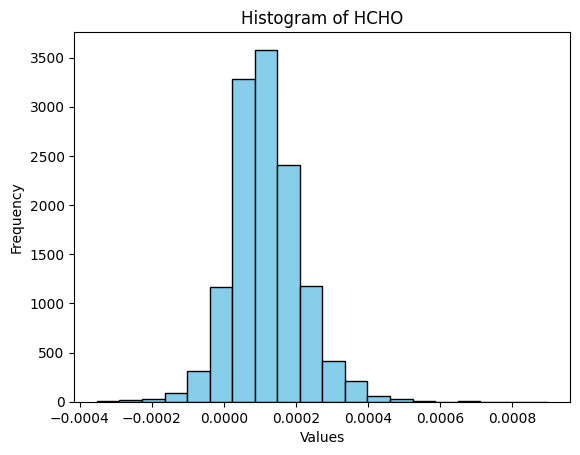

In [18]:
import matplotlib.pyplot as plt


# Extract the values from the DataFrame column
column_values = pandas_df['HCHO']

# Plot the histogram
plt.hist(column_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')

# Show the plot
plt.show()


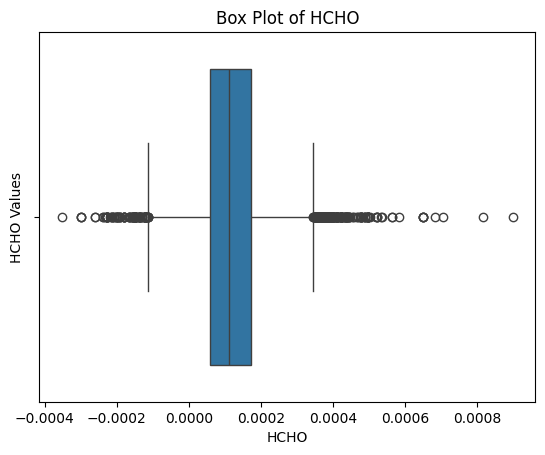

In [19]:
import seaborn as sns

# Extract the values from the DataFrame column
column_values = pandas_df['HCHO']

# Plot the box plot
sns.boxplot(x=column_values)

# Add labels and title
plt.ylabel('HCHO Values')
plt.title('Box Plot of HCHO')

# Show the plot
plt.show()


In [20]:
q1 = pandas_df['HCHO'].quantile(0.25)
q3 = pandas_df['HCHO'].quantile(0.75)

IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
lower_bound,upper_bound

(-0.0001128555311122474, 0.0003439989012229486)

In [21]:
df_IQR = pandas_df[(pandas_df['HCHO']>lower_bound) & (pandas_df['HCHO']<upper_bound)]


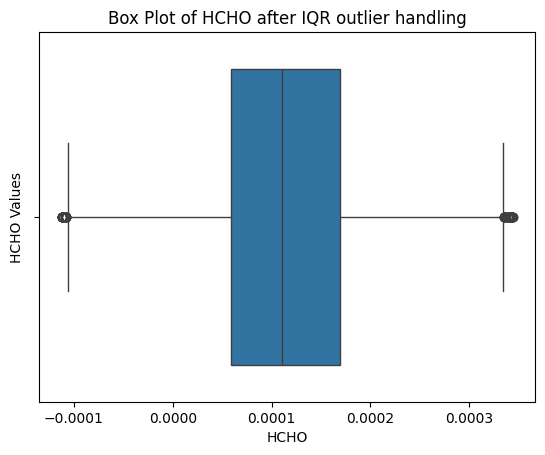

In [22]:
# Extract the values from the DataFrame column
column_values = df_IQR['HCHO']

# Plot the box plot
sns.boxplot(x=column_values)

# Add labels and title
plt.ylabel('HCHO Values')
plt.title('Box Plot of HCHO after IQR outlier handling')

# Show the plot
plt.show()


In [23]:
df_IQR

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000080,Kandy Proper,2023-12-31,2024-01-01
12779,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


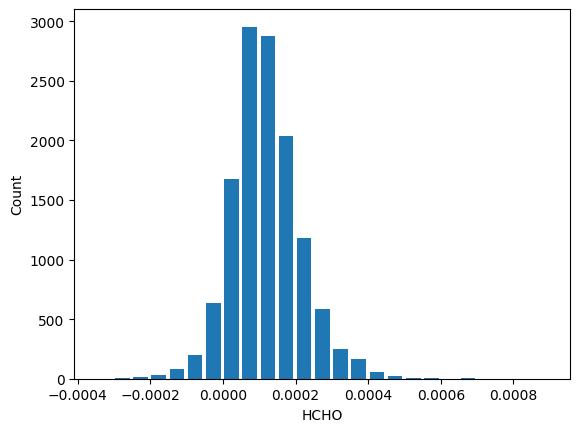

In [24]:
plt.hist(pandas_df.HCHO, bins=25, rwidth=0.8)
plt.xlabel('HCHO')
plt.ylabel('Count')
plt.show()

In [25]:
upper_limit = pandas_df.HCHO.mean()+ 3* pandas_df.HCHO.std()
upper_limit

0.000408440559323617

In [26]:
lower_limit = pandas_df.HCHO.mean()- 3* pandas_df.HCHO.std()
lower_limit

-0.0001708394603585672

In [27]:
df_hist = pandas_df[(pandas_df['HCHO']>lower_limit) & (pandas_df['HCHO']<upper_limit)]


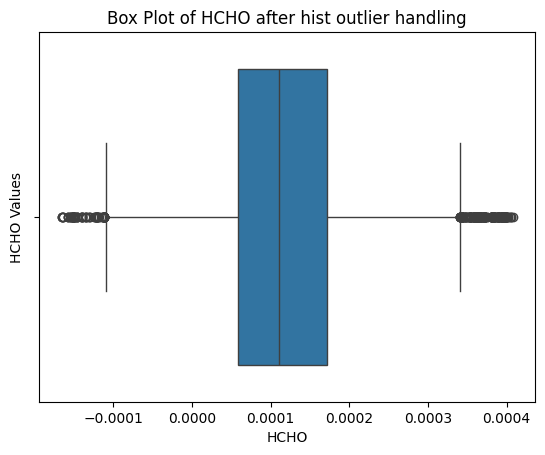

In [28]:
# Extract the values from the DataFrame column
column_values = df_hist['HCHO']

# Plot the box plot
sns.boxplot(x=column_values)

# Add labels and title
plt.ylabel('HCHO Values')
plt.title('Box Plot of HCHO after hist outlier handling')

# Show the plot
plt.show()


In [29]:
df_hist

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000080,Kandy Proper,2023-12-31,2024-01-01
12779,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [30]:
pandas_df['Z-Score'] = (pandas_df.HCHO - pandas_df.HCHO.mean()) / pandas_df.HCHO.std()
pandas_df

,HCHO,Location,Current date,Next date,Z-Score
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,0.809794
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02,0.809794
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02,0.593193
3,0.000176,Kandy Proper,2019-01-01,2019-01-02,0.593193
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02,0.593193
...,...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01,-0.398122
12778,0.000080,Kandy Proper,2023-12-31,2024-01-01,-0.398122
12779,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01,-0.553018
12780,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,-0.553018


In [31]:
df_zscore = pandas_df[(pandas_df['Z-Score']>-3) &(pandas_df['Z-Score']<3)]
df_zscore

,HCHO,Location,Current date,Next date,Z-Score
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,0.809794
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02,0.809794
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02,0.593193
3,0.000176,Kandy Proper,2019-01-01,2019-01-02,0.593193
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02,0.593193
...,...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01,-0.398122
12778,0.000080,Kandy Proper,2023-12-31,2024-01-01,-0.398122
12779,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01,-0.553018
12780,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,-0.553018


In [33]:
pandas_df = df_IQR
pandas_df.isnull().sum()

HCHO            0
Location        0
Current date    0
Next date       0
dtype: int64

In [40]:
for column in pandas_df.columns:
    unique_values = pandas_df[column].unique()
    print()
    print(f"Unique values in column '{column}': {unique_values}")
    print()



Unique values in column 'HCHO': [1.96983440e-04 1.76071346e-04 8.82972554e-05 ... 1.16658954e-04
 8.03631756e-05 6.54085299e-05]


Unique values in column 'Location': ['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Unique values in column 'Current date': [datetime.date(2019, 1, 1) datetime.date(2019, 1, 2)
 datetime.date(2019, 1, 3) ... datetime.date(2023, 12, 29)
 datetime.date(2023, 12, 30) datetime.date(2023, 12, 31)]


Unique values in column 'Next date': [datetime.date(2019, 1, 2) datetime.date(2019, 1, 3)
 datetime.date(2019, 1, 4) ... datetime.date(2023, 12, 30)
 datetime.date(2023, 12, 31) datetime.date(2024, 1, 1)]



In [41]:
import pandas as pd

# Sample DataFrame
df = pandas_df

# Function to check if data in a column is in the correct format
def check_column_format(column):
    # Check if the column contains numeric values
    if pd.to_numeric(column, errors='coerce').notnull().all():
        return "Numeric"
    # Check if the column contains date values
    elif pd.to_datetime(column, errors='coerce').notnull().all():
        return "Date"
    # If neither numeric nor date, consider it as a string
    else:
        return "String"

# Iterate through each column and check its format
for column in df.columns:
    format_type = check_column_format(df[column])
    print(f"Column '{column}' is of type: {format_type}")


Column 'HCHO' is of type: Numeric
Column 'Location' is of type: String
Column 'Current date' is of type: Date
Column 'Next date' is of type: Date


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12700\4012716249.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  elif pd.to_datetime(column, errors='coerce').notnull().all():
